#Smart Watch Development Analysis

###Company is thinking to upgrade four below features:
###1. GPS and Wi-Fi with the most up-to-date technology. 
###2. Making it modular, so that it consists of replaceable and interchangeable modules.
###3. Adding a high-end camera.
###4. Adding a high-end battery, so that it lasts twice as long as the competing products.

In [2]:
#inputs
market_multiplier = 1.1
p_baseline = 100
p_gps = 40
p_modular = 35
p_camera = 20
p_battery = 15
investment_cost = 90

In [3]:
#profit projection calculation
profit = p_baseline + market_multiplier*((p_gps + p_modular + p_camera + p_battery)**0.5)
net_profit = profit - investment_cost
print(f'The projected net profit of launching this product is {net_profit} million dollars')

The projected net profit of launching this product is 21.536897329871664 million dollars


#Monte Carlo simulation

##Model for net_profit

In [5]:
#model for netprofit
def net_profit(market_multiplier, p_baseline, p_gps, p_modular, p_camera, p_battery, investment_cost):
  profit = p_baseline + market_multiplier*((p_gps + p_modular + p_camera + p_battery)**0.5)
  net_profit = profit - investment_cost
  return net_profit


##Lets simulate the following independent random variables with 10000 simulated numbers
###• 𝑀 = N(1.1, .1)
###• Baseline = N(100, 10)
###• GPS.WIFI = 𝑁(40,8)
###• Modular = 𝑁(35,20)
###• Camera = 𝑁(20,7)
###• Battery = 𝑁(15,8) 
###• Cost of Investment = 𝑁(90,10)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
num_sim = 10000
sim_market_multiplier = np.random.normal(1.1,0.1,num_sim)
sim_baseline = np.random.normal(100,10,num_sim)
sim_gps = np.random.normal(40,8,num_sim)
sim_modular = np.random.normal(35,20,num_sim)
sim_camera = np.random.normal(20,7,num_sim)
sim_battery = np.random.normal(15,8,num_sim)
sim_investment = np.random.normal(90,10,num_sim)


(array([  14.,   98.,  446., 1419., 2598., 2763., 1782.,  688.,  172.,
          20.]), array([-32.41566797, -21.91346236, -11.41125675,  -0.90905113,
          9.59315448,  20.09536009,  30.59756571,  41.09977132,
         51.60197694,  62.10418255,  72.60638816]), <a list of 10 Patch objects>)

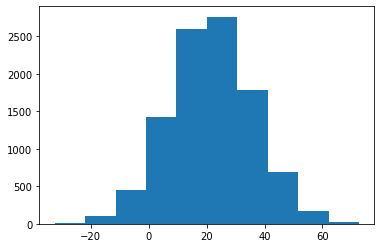

In [13]:
#Q1)Histogram of the simulated 10000 net profit outcomes
sim_profits = [net_profit(market_multiplier=sim_market_multiplier[i],
                          p_baseline=sim_baseline[i], 
                          p_gps=sim_gps[i], 
                          p_modular=sim_modular[i], 
                          p_camera=sim_camera[i], 
                          p_battery=sim_battery[i], 
                          investment_cost=sim_investment[i]) for i in range(num_sim)]
plt.hist(sim_profits)
##Simulated probability of negative net_profit values are really less as only few values are below 0 out of 10,000

##Multiple Linear Regression on the simulated data to see how simulated input effect net profits

In [17]:
import pandas as pd
import statsmodels.api as sm

In [18]:
data = pd.DataFrame(zip(sim_profits, sim_market_multiplier, sim_baseline, sim_gps, sim_modular, sim_camera, sim_battery, sim_investment),
                    columns= ['sim_profits', 'sim_market_multiplier', 'sim_baseline', 'sim_gps', 'sim_modular', 'sim_camera', 'sim_battery', 'sim_investment'])
data

,sim_profits,sim_market_multiplier,sim_baseline,sim_gps,sim_modular,sim_camera,sim_battery,sim_investment
0,23.232218,1.011922,99.110225,48.842828,40.245996,34.825047,15.544478,87.828040
1,20.486635,1.163586,89.572586,37.770815,65.102651,27.606746,15.878422,83.162875
2,35.843841,1.211409,100.860903,33.116983,38.982080,17.405659,17.097516,77.524661
3,23.489725,1.016325,95.620690,47.331134,30.981543,24.277080,31.559868,83.902342
4,29.910880,0.976105,113.215171,36.441753,25.277858,21.580913,22.113531,93.326094
...,...,...,...,...,...,...,...,...
9995,30.875001,1.000361,108.453008,42.549801,30.357648,14.356651,16.986298,87.792006
9996,7.579525,1.142950,104.256363,33.256182,50.887425,14.694921,13.633838,108.798162
9997,17.072723,1.163308,104.369452,43.186275,42.581042,25.877186,9.533846,100.102543
9998,32.148787,1.017935,112.362393,34.660015,30.848728,33.312149,14.987965,91.073065


In [20]:
X = sm.add_constant(data[['sim_market_multiplier', 'sim_baseline', 'sim_gps', 'sim_modular', 'sim_camera', 'sim_battery', 'sim_investment']])
Y = data['sim_profits']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
model =sm.OLS(Y, X, hasconstant=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sim_profits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.168e+07
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:08:45   Log-Likelihood:                 4223.3
No. Observations:               10000   AIC:                            -8431.
Df Residuals:                    9992   BIC:                            -8373.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.8591      0.029   -201.317      0.000      -5.916      -5.802
sim_market_multiplier    10.4514      0.016    667.585      0.000      10.421      10.482
sim_baseline              0.9997      0.000   6348.918      0.000       0.999       1.000
sim_gps                   0.0535      0.000    270.212      0.000       0.053       0.054
sim_modular               0.0533   7.93e-05    671.729      0.000       0.053       0.053
sim_camera                0.0531      0.000    233.236      0.000       0.053       0.054
sim_battery               0.0533      0.000    268.756      0.000       0.053       0.054
sim_investment           -1.0001      0.000  -6358.421      0.000      -1.000      -1.000
==============================================================================
Omnibus:                     5927.826   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75332.500
Skew:                          -2.634   Prob(JB):                         0.00
Kurtosis:                      15.371   Cond. No.                     2.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we can see the coefficients reflect the relationship of each variable with output. For eg. Effect of battery being one std dev above the baseline is 0.05 million on the net_profits 